In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
from sklearn.decomposition import NMF, TruncatedSVD
!python -m spacy download en_core_web_lg

2023-09-12 02:12:49.435193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [33]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [4]:
#Read CSV File
df = pd.read_csv("Complaints-2022-Dataset.csv", engine = "python", error_bad_lines = False)

<ipython-input-4-3627680c128a>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("Complaints-2022-Dataset.csv", engine = "python", error_bad_lines = False)


In [5]:
df = df.dropna(subset = "Consumer complaint narrative")
df = df.sample(5000, random_state = 14)

In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
77684,08/01/22,Credit card or prepaid card,General-purpose credit card or charge card,Incorrect information on your report,Information belongs to someone else,On XX/XX/2022. I checked my credit report on X...,None,"Genesis FS Card Services, Inc.",FL,331XX,None,Consent provided,Web,08/01/22,Closed with explanation,Yes,NaN,5832071.0
23382,03/08/22,Debt collection,Federal student loan debt,Written notification about debt,Didn't receive notice of right to dispute,Reliant Capital Solution XXXXXXXX XXXX XXXXXXX...,None,"Reliant Capital Solutions, LLC",IN,478XX,None,Consent provided,Web,03/08/22,Closed with non-monetary relief,Yes,NaN,5296247.0
30177,10/20/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,I sent in and on XX/XX/2022 and received no re...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,90601,None,Consent provided,Web,10/21/22,Closed with explanation,Yes,NaN,6109210.0
36789,10/15/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I'm sending this Complaint to inform you that ...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90255,None,Consent provided,Web,10/15/22,Closed with non-monetary relief,Yes,NaN,6089082.0
37689,10/08/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,None,"EQUIFAX, INC.",AL,35806,Servicemember,Consent provided,Web,10/08/22,Closed with explanation,Yes,NaN,6061838.0


In [7]:
stopwords = list(ENGLISH_STOP_WORDS)
nlp = spacy.load("en_core_web_lg")

In [10]:
#Function to preprocess text, convert to lowercase, remove numbers, punctuation, and stopwords
#Select only noun, verbs, adjectives, and lemmatize words
tags = ["NOUN", "VERB", "ADJ"]
def preprocess(txt):
  txt = txt.lower()
  txt = re.sub(r'[^A-Za-z]', ' ', txt)
  doc = nlp(txt)
  lemmatized_words = [token.lemma_ for token in doc if token.pos_ in tags]
  clean_words = [word for word in lemmatized_words if word not in stopwords and len(word) > 2]
  return " ".join(clean_words)

In [11]:
#Preprocessing consumer complaints
df['Complaints'] = df['Consumer complaint narrative'].apply(preprocess)

In [12]:
#Relevant nouns, verbs, and adjectives in consumer complaints
df['Complaints']

77684    check credit report account way retail credit ...
23382    reliant capital solution send collection notic...
30177            send receive response send day ask comply
36789    send complaint inform victim identity theft fa...
37689    accordance fair credit reporting act list acco...
                               ...                        
39569    multiple account open permission authorization...
52292    company foster send letter say sue beginning s...
64202    submit complaint today inform victim identity ...
51831    fifth bank charge credit card close close acco...
3592     delinquent account report credit make aware ne...
Name: Complaints, Length: 5000, dtype: object

In [16]:
complaints = df['Complaints'].dropna().to_list()
all_words = []
for txt in complaints:
  words = txt.split()
  all_words.extend(words)
all_words[:5]

['check', 'credit', 'report', 'account', 'way']

In [17]:
#Frequencies of most common phrases entered as consumer complaints
word_freq = nltk.FreqDist(all_words)
word_freq

FreqDist({'account': 9853, 'credit': 9409, 'report': 8384, 'information': 5279, 'consumer': 4964, 'reporting': 3307, 'section': 3116, 'state': 3063, 'payment': 2465, 'right': 2427, ...})

In [18]:
#Top 10 phrases by occurence
word_freq.most_common(10)

[('account', 9853),
 ('credit', 9409),
 ('report', 8384),
 ('information', 5279),
 ('consumer', 4964),
 ('reporting', 3307),
 ('section', 3116),
 ('state', 3063),
 ('payment', 2465),
 ('right', 2427)]

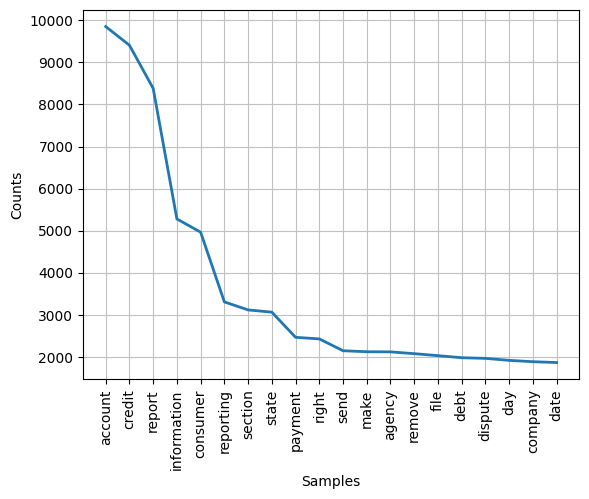

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
#Top 20 words appearing across complaints in dataset
word_freq.plot(20)

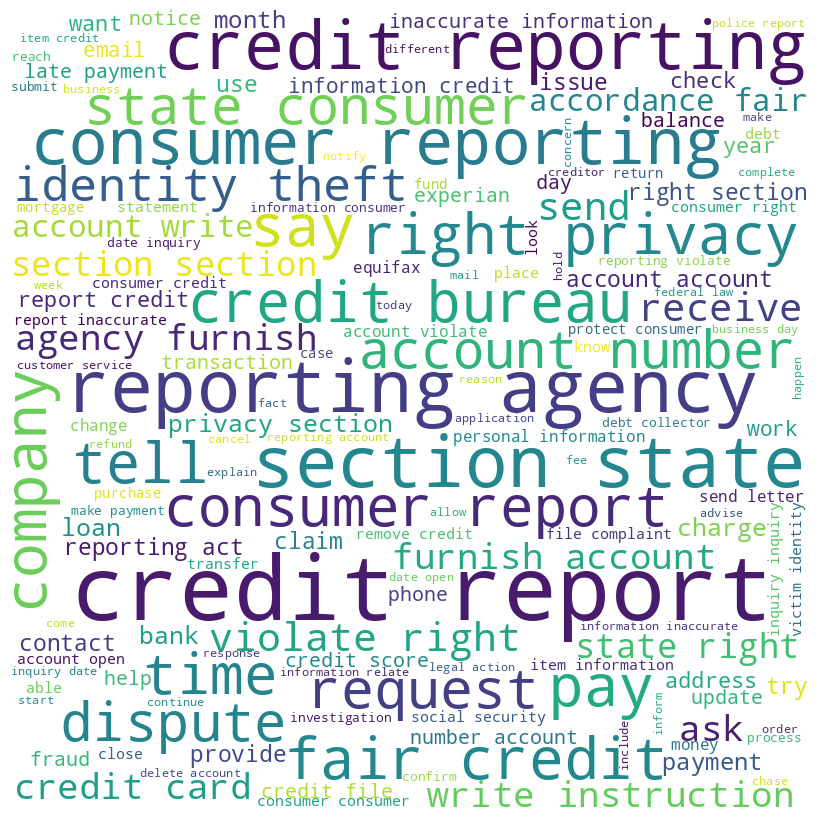

In [21]:
#Create Wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(all_words))

#Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [22]:
#Topic modeling algorithms
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
#Before topic modeling, we have to vectorize the text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [23]:
#Vectorizing text
corpus = df['Complaints'].dropna().to_list()
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
dtm = vectorizer.fit_transform(corpus)

In [25]:
pd.DataFrame(dtm.toarray(), columns = vectorizer.get_feature_names_out()).head()

,aacount,aacount belong,aag,aag handling,aag response,aauthorize,aauthorize consumer,abandon,abandon fund,abandon property,...,zombie,zombie debt,zombie script,zombie second,zone,zone application,zone case,zone commercial,zoom,zoom work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#NMF, specifying 25 topics
nmf = NMF(n_components = 25)
doc_topic_matrix = nmf.fit_transform(dtm)

In [27]:
#Topic modeling function
import numpy as np
def generate_topics(matrix, topn = 20):
    for i, words in enumerate(matrix.components_):
        topic = "Topic_" + str(i + 1) + ":\n\n"
        indices = np.argsort(words)[::-1][:topn] #top twenty words
        print(topic, ", ".join(vectorizer.get_feature_names_out()[indices]))
        print('*' * 50)

In [28]:
#Topics related to credit score concerns, inaccurate reporting, fradulent activity,
generate_topics(nmf, topn = 20)

Topic_1:

 section, section state, right, state, reporting, accordance fair, violate right, privacy section, state right, furnish account, right section, section section, agency furnish, account write, state consumer, right privacy, write instruction, instruction, accordance, privacy
**************************************************
Topic_2:

 validate, erroneous, validate reporting, unverified information, fail validate, discover information, need investigate, information, provide proof, account unverified, discover, information provide, unverified, bureaus validate, validate account, credit, reporting account, review, fail, credit report
**************************************************
Topic_3:

 use, consent, consumer report, authorization unauthorized, perjury allege, knowledge investigate, unauthorized use, number card, use social, account knowledge, card use, use personal, allege person, money successful, successful create, apply good, company authorization, information apply,

In [35]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [36]:
#Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [37]:
#Finds polarity score for each consumer complaint
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Complaints']
  row_id = row['Complaint ID']
  res[row_id] = sia.polarity_scores(text)



  0%|          | 0/5000 [00:00<?, ?it/s]

In [38]:
#Create dataframe with polarity scores
polarity_df = pd.DataFrame(res).T.reset_index().rename(columns = {'index': 'Complaint ID'})
polarity_df

,Complaint ID,neg,neu,pos,compound
0,5832071.0,0.101,0.524,0.375,0.7430
1,5296247.0,0.000,0.787,0.213,0.4215
2,6109210.0,0.000,1.000,0.000,0.0000
3,6089082.0,0.084,0.663,0.253,0.7717
4,6061838.0,0.153,0.754,0.093,-0.7096
...,...,...,...,...,...
4995,6050527.0,0.273,0.588,0.140,-0.9758
4996,6180579.0,0.263,0.737,0.000,-0.9538
4997,6217356.0,0.246,0.687,0.067,-0.9153
4998,5081543.0,0.086,0.558,0.355,0.9423


In [39]:
#Merge original dataframe with the polarity of each complaint
df = pd.merge(polarity_df, df, on = 'Complaint ID', how = 'inner')
df.columns

Index(['Complaint ID', 'neg', 'neu', 'pos', 'compound', 'Date received',
       'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaints'],
      dtype='object')

In [40]:
#Updated dataframe with polarity levels
df.head()

,Complaint ID,neg,neu,pos,compound,Date received,Product,Sub-product,Issue,Sub-issue,...,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaints
0,5832071.0,0.101,0.524,0.375,0.7430,08/01/22,Credit card or prepaid card,General-purpose credit card or charge card,Incorrect information on your report,Information belongs to someone else,...,FL,331XX,None,Consent provided,Web,08/01/22,Closed with explanation,Yes,NaN,check credit report account way retail credit ...
1,5296247.0,0.000,0.787,0.213,0.4215,03/08/22,Debt collection,Federal student loan debt,Written notification about debt,Didn't receive notice of right to dispute,...,IN,478XX,None,Consent provided,Web,03/08/22,Closed with non-monetary relief,Yes,NaN,reliant capital solution send collection notic...
2,6109210.0,0.000,1.000,0.000,0.0000,10/20/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,...,CA,90601,None,Consent provided,Web,10/21/22,Closed with explanation,Yes,NaN,send receive response send day ask comply
3,6089082.0,0.084,0.663,0.253,0.7717,10/15/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,...,CA,90255,None,Consent provided,Web,10/15/22,Closed with non-monetary relief,Yes,NaN,send complaint inform victim identity theft fa...
4,6061838.0,0.153,0.754,0.093,-0.7096,10/08/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,...,AL,35806,Servicemember,Consent provided,Web,10/08/22,Closed with explanation,Yes,NaN,accordance fair credit reporting act list acco...
